# Noise **Reduction**

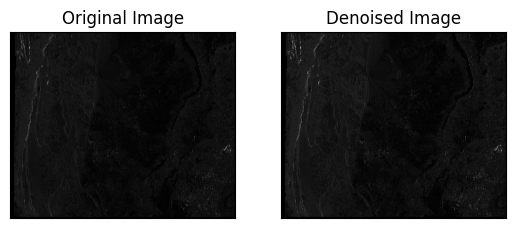

True

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread(r"/content/Dadu city.tif", 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite('denoised_image.tif', blurred_image)


# **Color Mapping**

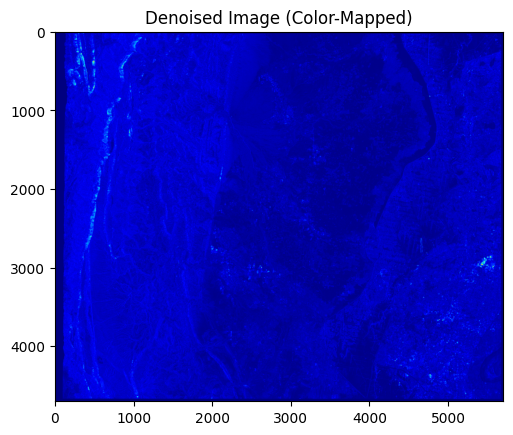

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread(r"/content/Dadu city.tif", 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

# **Mean Squared Error**

In [38]:
import numpy as np

def mse(image1, image2): return np.mean((image1 - image2) ** 2)

original_image = cv2.imread(r"/content/Dadu city.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

# **Structural Similarity Index (SSIM)**

In [39]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread(r"/content/Dadu city.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9325836619424479


# **Reading Specific Pixel Value**

In [40]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r"/content/Dadu city.tif", 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 22
Denoised pixel value at (150, 150): 19


# **# Fourier transformation**

Original Image Amplitude (Magnitude):
[[ 218.         1865.57224838 2563.10987031 ... 6359.20723216
  2563.10987031 1865.57224838]
 [5511.28988519 1881.71666298 2887.54279578 ... 3965.12034568
  3288.68652155 1923.38014412]
 [2124.65232284 3863.38489679 1924.17616666 ... 5959.18988743
  2508.80697469 1854.09778729]
 ...
 [ 976.01320034 2702.32392376 1187.9135354  ... 4410.7612202
  4870.02754589 3192.65417116]
 [2124.65232284 1854.09778729 2508.80697469 ... 2362.67308797
  1924.17616666 3863.38489679]
 [5511.28988519 1923.38014412 3288.68652155 ... 1252.8354333
  2887.54279578 1881.71666298]]
Denoised Image Amplitude (Magnitude):
[[1632.          763.32377196  802.58535159 ... 1796.28857022
   802.58535159  763.32377196]
 [1258.67539532 1760.28826061 1143.08588536 ... 1973.25014291
  1181.88110528 3272.50712631]
 [1511.92859541 1652.72393912  998.22802768 ... 3791.53470208
  2221.92182875  421.46367938]
 ...
 [1246.65601372  951.4733462  1436.72798155 ... 1180.1163179
   615.78813637 2

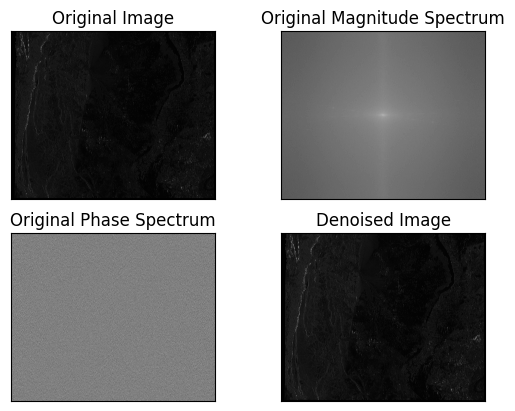

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r"/content/Dadu city.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")